In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf

In [25]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Load Data 
with open('/content/drive/MyDrive/Colab Notebooks/data_emotions/emotions.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

In [28]:
# Reshape Data
x_pre_1 = x_train[1]
x_pre_2 = x_train[12]
x_pre_3 = x_train[25]
x_pre_4 = x_train[38]
x_pre_5 = x_train[52]


# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 4)

In [29]:
# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 60, batch_size = 64, validation_split = 0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 881ms/step - loss: 1.3705 - acc: 0.3750 - val_loss: 38.4369 - val_acc: 0.2500
Epoch 2/60
1/1 [==============================] - 0s 142ms/step - loss: 39.9057 - acc: 0.2500 - val_loss: 13.1292 - val_acc: 0.0000e+00
Epoch 3/60
1/1 [==============================] - 0s 127ms/step - loss: 11.5992 - acc: 0.2708 - val_loss: 2.5643 - val_acc: 0.6667
Epoch 4/60
1/1 [==============================] - 0s 118ms/step - loss: 3.3389 - acc: 0.2292 - val_loss: 1.8156 - val_acc: 0.0833
Epoch 5/60
1/1 [==============================] - 0s 119ms/step - loss: 1.5055 - acc: 0.4167 - val_loss: 2.1110 - val_acc: 0.2500
Epoch 6/60
1/1 [==============================] - 0s 119ms/step - loss: 1.6944 - acc: 0.3542 - val_loss: 2.1398 - val_acc: 0.0000e+00
Epoch 7/60
1/1 [==============================] - 0s 119ms/step - loss: 1.2718 - acc: 0.4583 - val_loss: 1.6111 - val_acc: 0.0833
Epoch 8/60
1/1 [==============================] - 0s 121ms/step - loss: 1.1927 - acc: 0.3

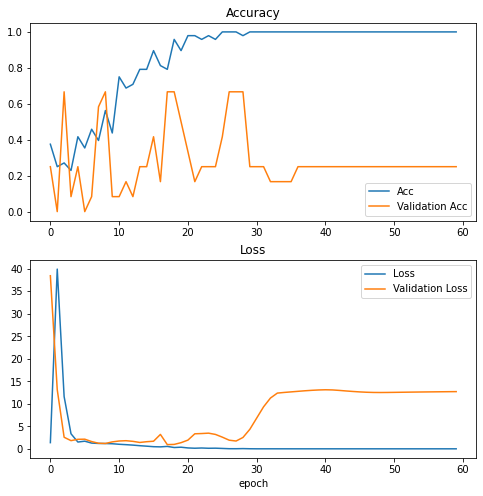

In [30]:
plot_history(his)

In [31]:
label = ['Gian du','Hanh Phuc','Ngac nhien','So hai']


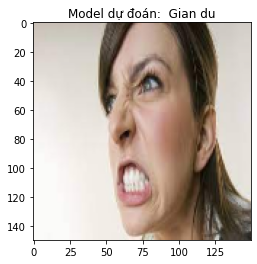

In [32]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_2.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

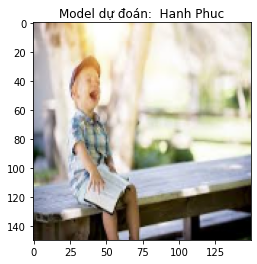

In [33]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

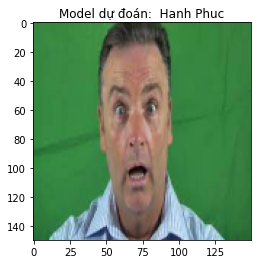

In [34]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_4.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_4, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

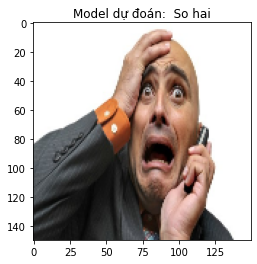

In [35]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_5.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_5, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

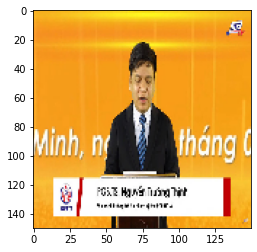

Hanh Phuc


In [38]:
img = tf.keras.utils.load_img("ThayEM.jpg", target_size = (150,150))
plt.imshow(img)
plt.show()
img = tf.keras.utils.img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /=255
print(label[np.argmax(model.predict(x_pre_4.reshape(1,150,150,3)))])

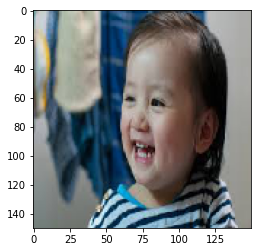

Hanh Phuc


In [43]:
img = tf.keras.utils.load_img("vuithu.jpg", target_size = (150,150))
plt.imshow(img)
plt.show()
img = tf.keras.utils.img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img /=255
print(label[np.argmax(model.predict(x_pre_4.reshape(1,150,150,3)))])